#### Mall Customers Clustering Analysis

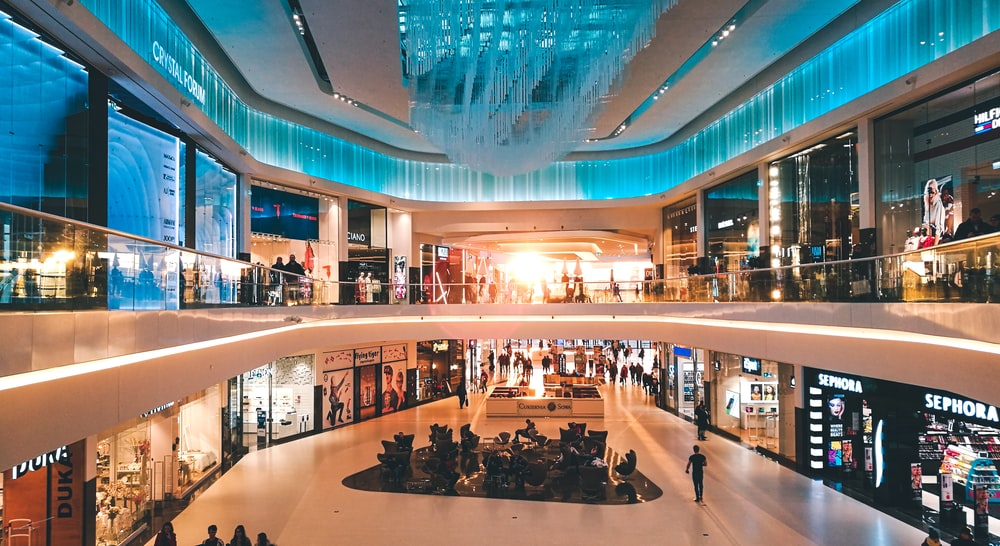

#### Libraries

In [12]:
#Mathematical operations
import numpy as np
import pandas as pd
from pandas import plotting

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Interactive Visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


#### Reading the Dataset

In [13]:
data=pd.read_csv('customerdata.csv')


In [17]:
#lets check if there is any NULL data
data.isnull.any().any()

AttributeError: 'function' object has no attribute 'any'

## Data Visualization

In [18]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'Count')

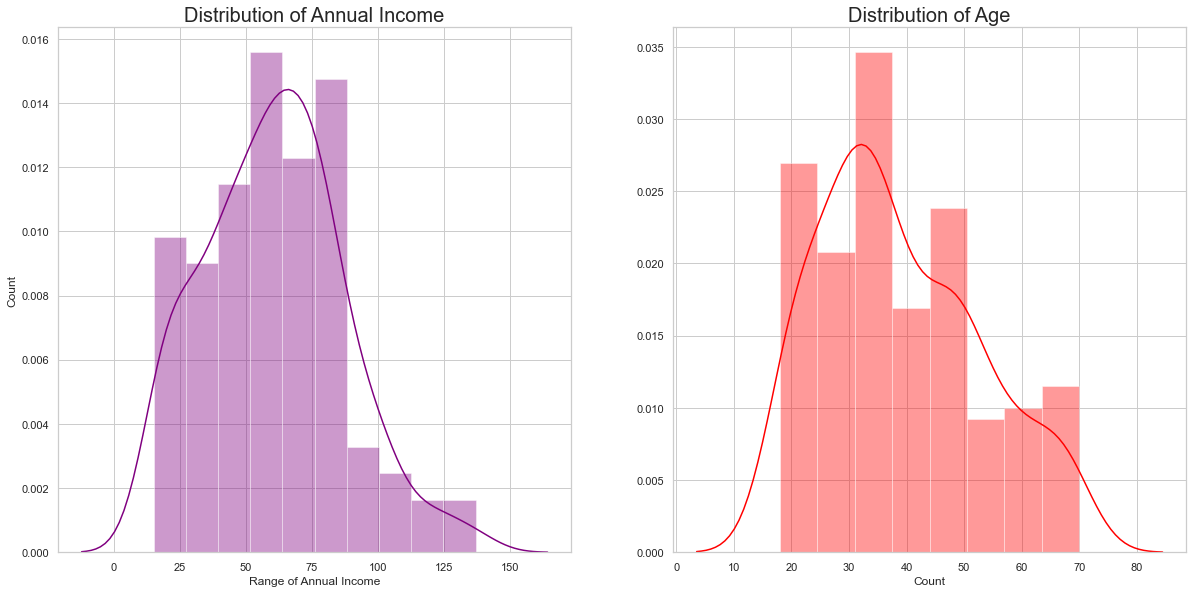

In [41]:
plt.rcParams['figure.figsize']=(18, 9)
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'], color='purple')
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style='whitegrid')
sns.distplot(data['Age'], color='Red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.xlabel('Count')

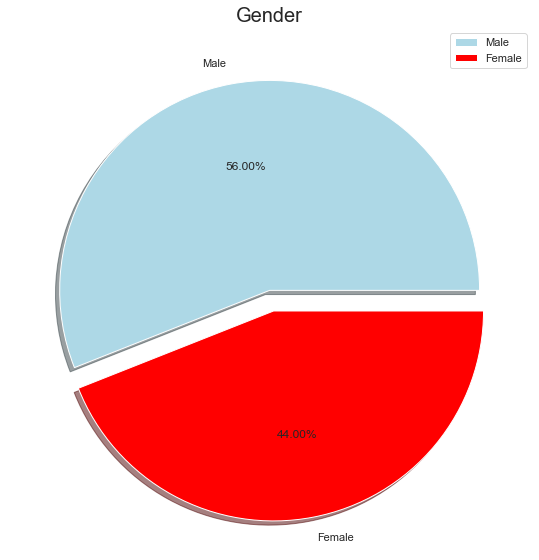

In [45]:
labels=['Male', 'Female']
size=data['Gender'].value_counts()
colors=['LightBlue', 'Red']
explode=[0, 0.1]

plt.rcParams['figure.figsize']=(9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

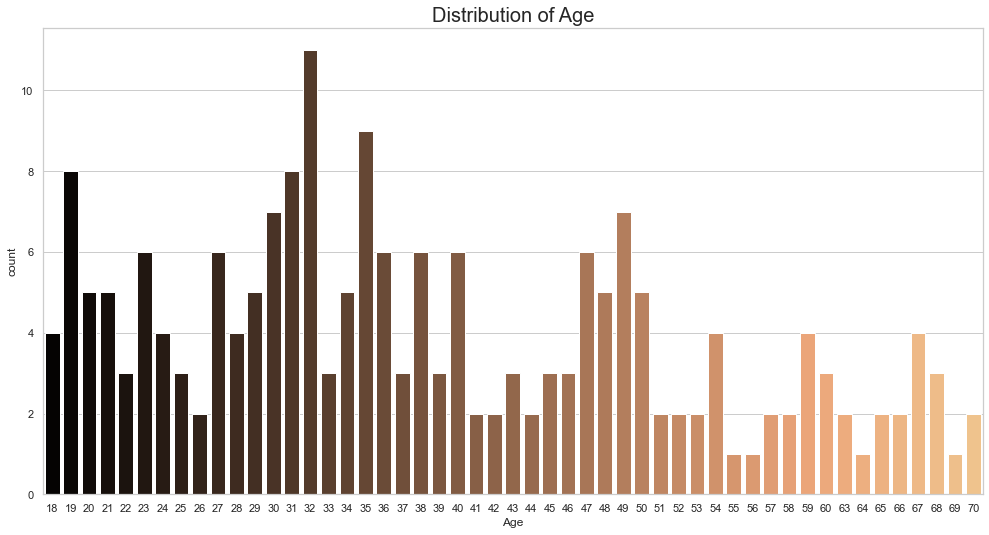

In [47]:
plt.rcParams['figure.figsize']=(15, 8)
sns.countplot(data['Age'], palette='copper')
plt.title('Distribution of Age', fontsize=20)
plt.show()

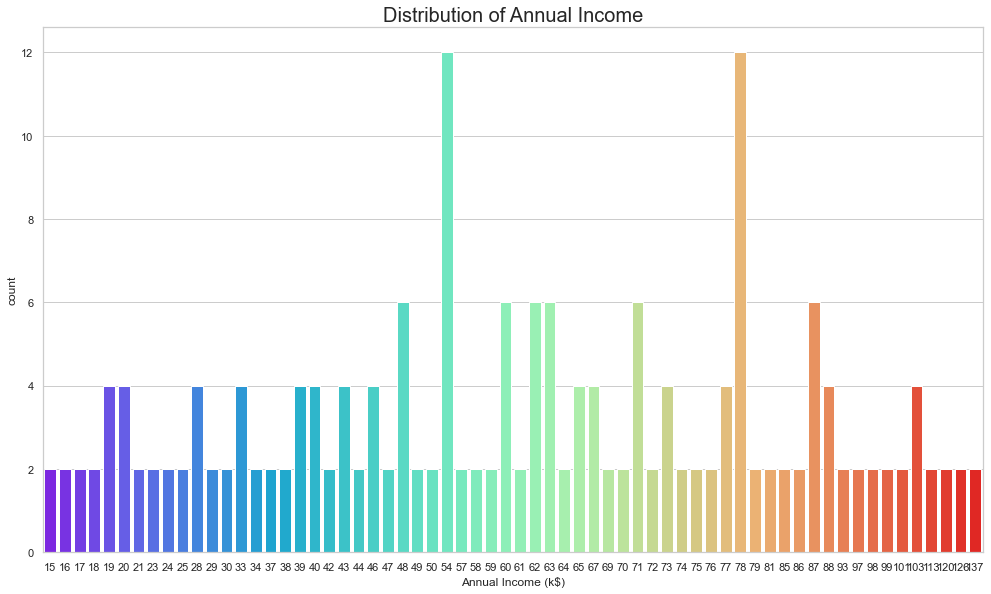

In [50]:
plt.rcParams['figure.figsize']= (15, 9)
sns.countplot(data['Annual Income (k$)'], palette='rainbow')
plt.title('Distribution of Annual Income', fontsize=20)
plt.show()

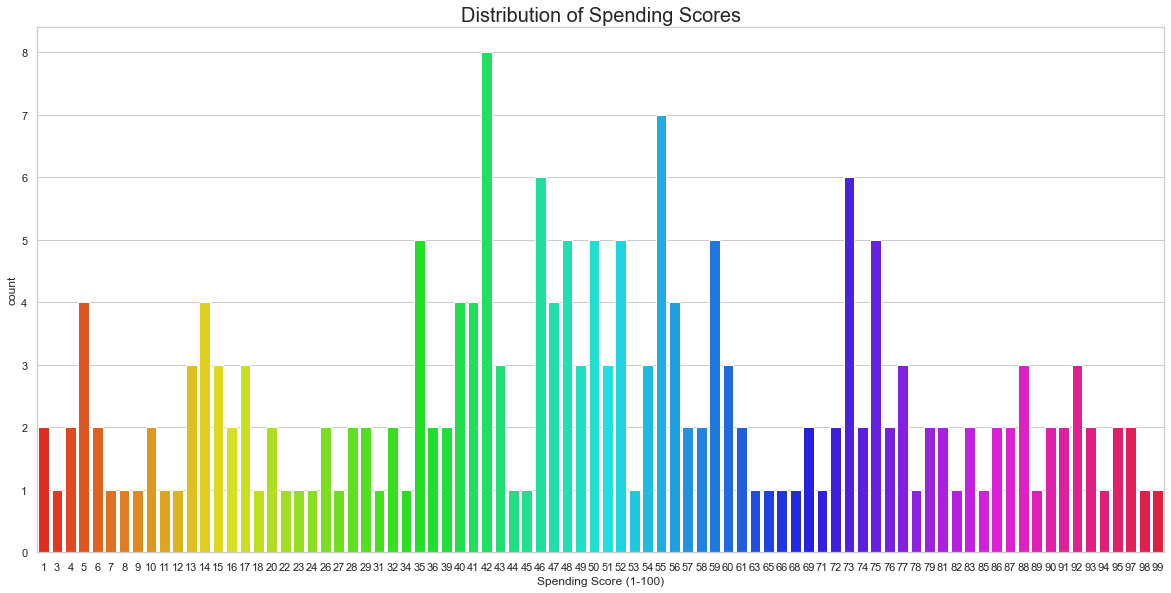

In [53]:
plt.rcParams['figure.figsize']=(18, 9)
sns.countplot(data['Spending Score (1-100)'], palette='hsv')
plt.title('Distribution of Spending Scores', fontsize=20)
plt.show()

#### Gender vs Spending Scores

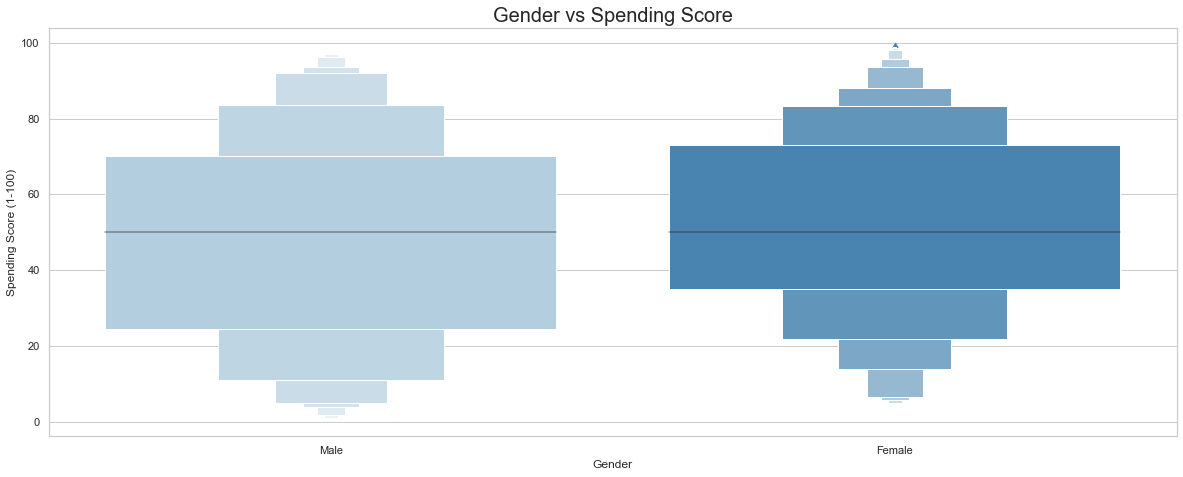

In [62]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette='Blues')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

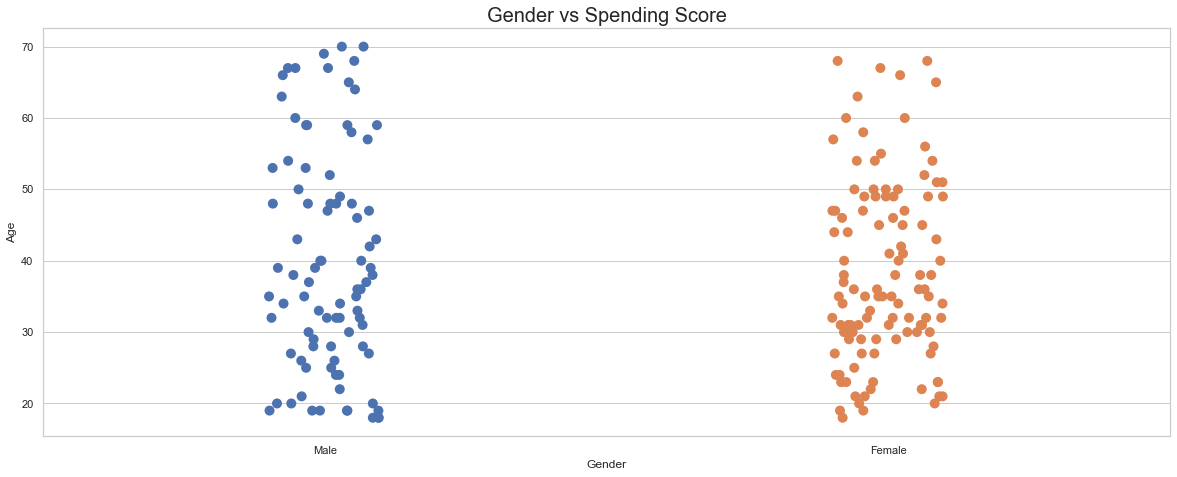

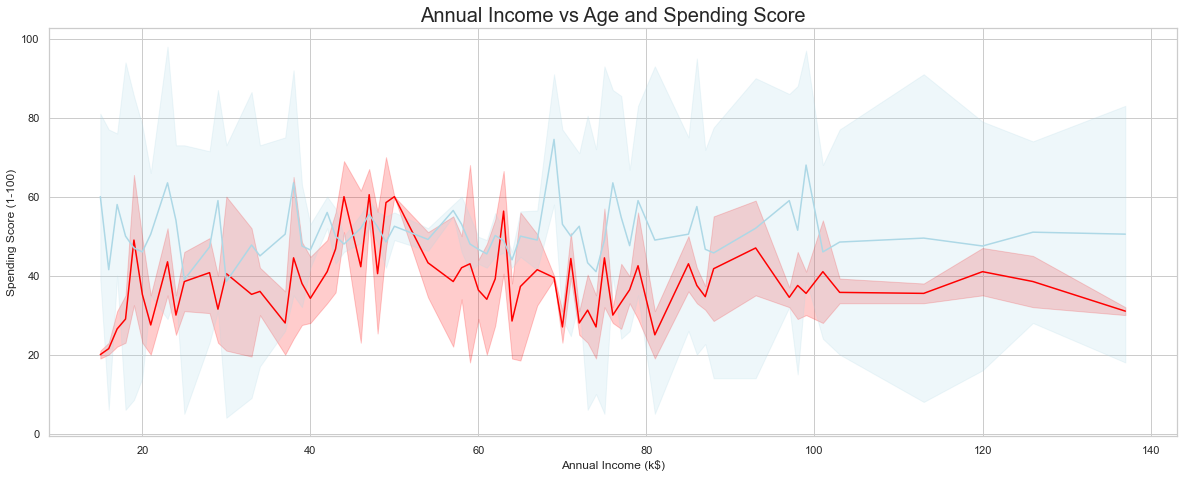

In [70]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']
sns.lineplot(x, y, color='Red')
sns.lineplot(x, z, color='LightBlue')
plt.title('Annual Income vs Age and Spending Score', fontsize=20)
plt.show()

### KMeans Algorithm

In [74]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


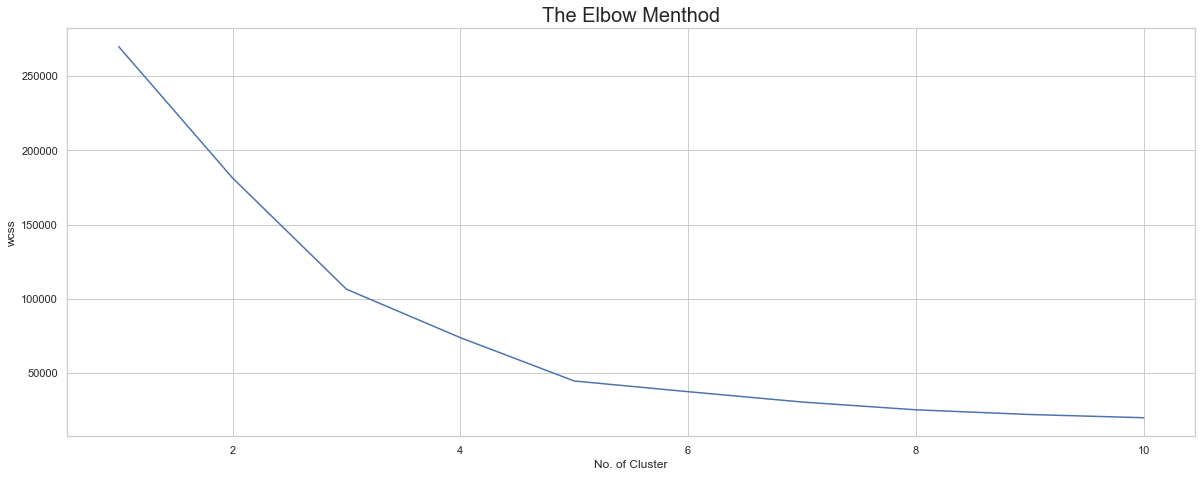

In [75]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Menthod', Fontsize=20)
plt.xlabel('No. of Cluster')
plt.ylabel('wcss')
plt.show()


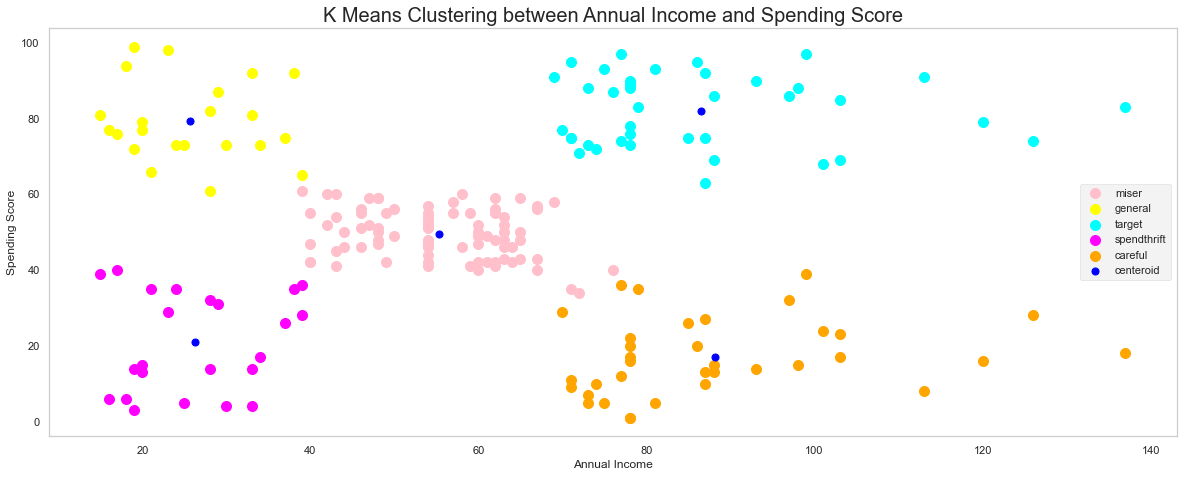

In [76]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Clustering between Age and Spending Score

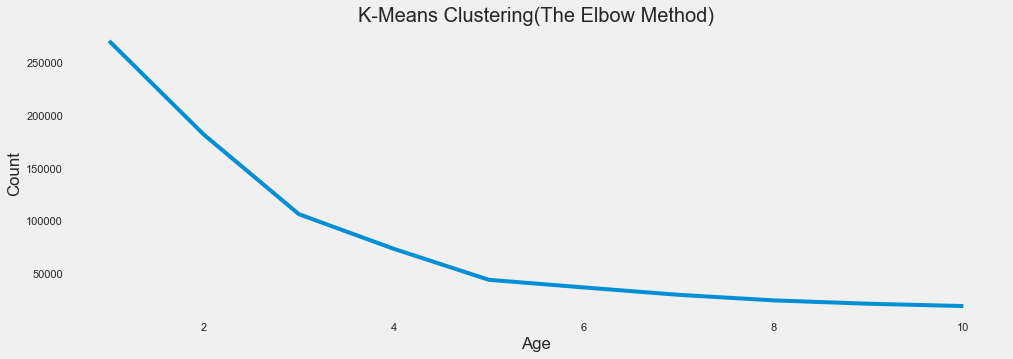

In [77]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

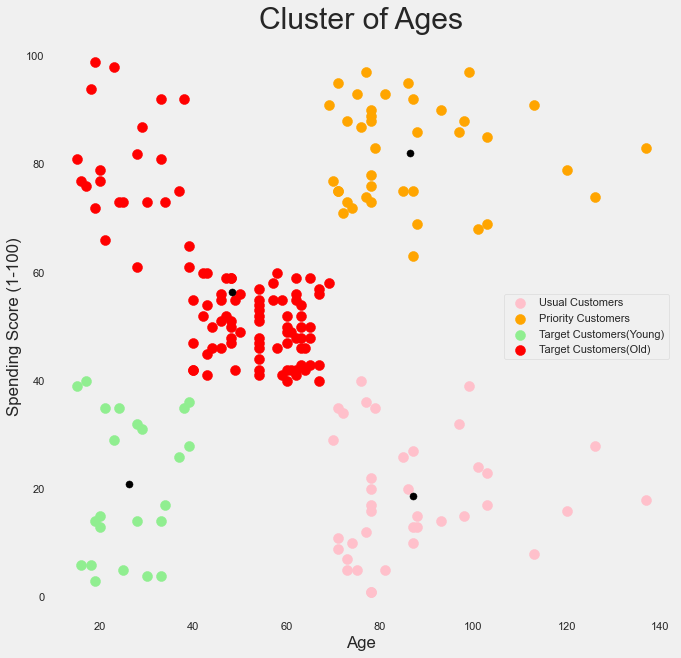

In [78]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()